## Prerequisites

In [1]:
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import importlib
from datetime import datetime, timedelta
import torch.optim as optim
import pandas as pd
from CompustatExtractor import CompustatExtractor
from MergeProcessor import RatingProcessor
import matplotlib.pyplot as plt

is_on_colab = False
import warnings
warnings.filterwarnings("ignore")

In [2]:
import Hypers
importlib.reload(Hypers)
import utils
importlib.reload(utils)
import Trainer
importlib.reload(Trainer)
import Inferencer
importlib.reload(Inferencer)

utils.fix_random_seed(Hypers.Config.seed)

if is_on_colab:
  Hypers.Config.base_path = os.getcwd()
  Hypers.Config.data_path = os.path.join(Hypers.Config.base_path, "data")
  Hypers.Config.model_path = os.path.join(Hypers.Config.base_path, "model")
  Hypers.Config.log_path = os.path.join(Hypers.Config.base_path, "log")
  Hypers.Config.US_data_path = os.path.join(Hypers.Config.data_path, "US_data")

print(f"{Hypers.Config.base_path=}")
print(f"{Hypers.Config.data_path=}")
print(f"{Hypers.Config.model_path=}")
print(f"{Hypers.Config.log_path=}")
print(f"{Hypers.Config.US_data_path=}")

Hypers.Config.base_path='d:\\Document\\Ucla-doc\\263\\project\\PNC_Capstone'
Hypers.Config.data_path='d:\\Document\\Ucla-doc\\263\\project\\PNC_Capstone\\data'
Hypers.Config.model_path='d:\\Document\\Ucla-doc\\263\\project\\PNC_Capstone\\model'
Hypers.Config.log_path='d:\\Document\\Ucla-doc\\263\\project\\PNC_Capstone\\log'
Hypers.Config.US_data_path='d:\\Document\\Ucla-doc\\263\\project\\PNC_Capstone\\data\\US_data'


In [3]:
suffix = "LSTM_US_kquarters"

## Load data & Data Preprocessing

In [4]:
features_path = os.path.join(Hypers.Config.data_path, "WRDS", "features_US.csv")
ratings_path =  os.path.join(Hypers.Config.data_path, "WRDS", "ratings_US.csv")

In [5]:
import itertools

preprocessing_options1 = [
    {"standardize": 'std', "add_cpi": True, "add_diff": False, 'balance_trend': False, 'balance_label': False},
    {"standardize": 'std', "add_cpi": True, "add_diff": True, 'balance_trend': False, 'balance_label': False},
    {"standardize": 'std', "add_cpi": True, "add_diff": True, 'balance_trend': False, 'balance_label': True},
]


architecture_options = [
    {"dropout": 0.2, "batch_norm": True, "num_lstm_layers": 2},
    {"dropout": 0.2, "batch_norm": True, "num_lstm_layers": 1},
    {"dropout": 0.2, "batch_norm": False, "num_lstm_layers": 2},
    {"dropout": 0.0, "batch_norm": True, "num_lstm_layers": 2},
    {"dropout": 0.0, "batch_norm": False, "num_lstm_layers": 2},
    {"dropout": 0.0, "batch_norm": False, "num_lstm_layers": 1},
    
]


## Training

In [6]:
import LSTMDataset
importlib.reload(LSTMDataset)
import LSTMModel
importlib.reload(LSTMModel)

model_type = "Lstm"

True
['actq', 'ancq', 'atq', 'cheq', 'cogsq', 'invtq', 'lctq', 'lltq', 'ltq', 'niq', 'ppentq', 'revtq', 'teqq', 'xsgaq', 'GrossProfitRatio', 'NetProfitRatio', 'CurrentRatio', 'QuickAcidRatio', 'CashRatio', 'EquityMultiplier', 'ReturnOnAsset', 'ReturnOnEquity', 'InventoryTurnover', 'CPI']
input_dict: 2509
output_dict: 1151
merged_dict: 775
603 172
max_seq_len=2
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': False, 'balance_trend': False, 'balance_label': False} {'dropout': 0.2, 'batch_norm': True, 'num_lstm_layers': 2}
The model structure is:  LSTMModel(
  (lstm1): LSTM(99, 16, num_layers=2, batch_first=True)
  (batch_norm): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [01:56<00:00,  1.72it/s, Loss: 0.002]


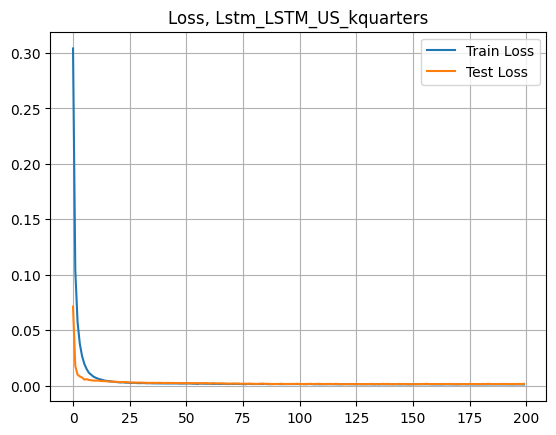

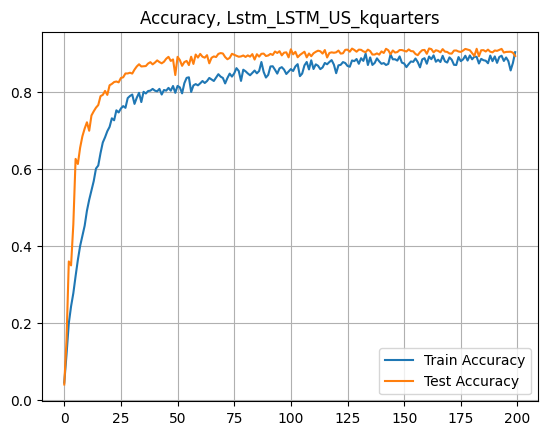

Plot Inference
pred: tensor([4., 3., 3., 3., 3., 3., 3., 3., 3., 3.], device='cuda:0')
truths: tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.], device='cuda:0')
diff_counter: Counter({0.0: 3291, 1.0: 331, 2.0: 52, 4.0: 6, 3.0: 5, 5.0: 1, 7.0: 1, 6.0: 1})
total_count=3688
[0.892353579175705, 0.9821041214750542, 0.9962039045553145, 0.9975596529284165, 0.9991865509761388]


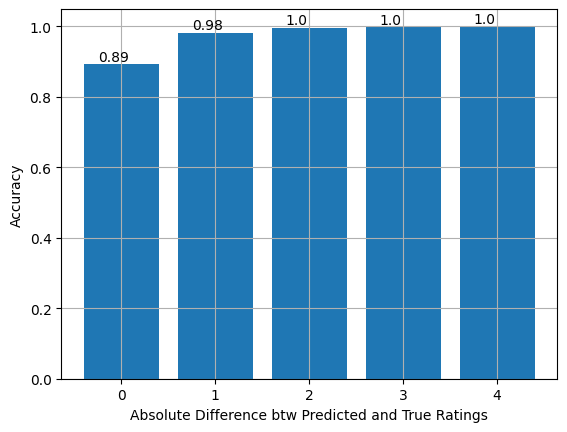

max_seq_len=1
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': False, 'balance_trend': False, 'balance_label': False} {'dropout': 0.2, 'batch_norm': True, 'num_lstm_layers': 1}
The model structure is:  LSTMModel(
  (lstm1): LSTM(99, 16, batch_first=True)
  (batch_norm): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [01:27<00:00,  2.29it/s, Loss: 0.002]


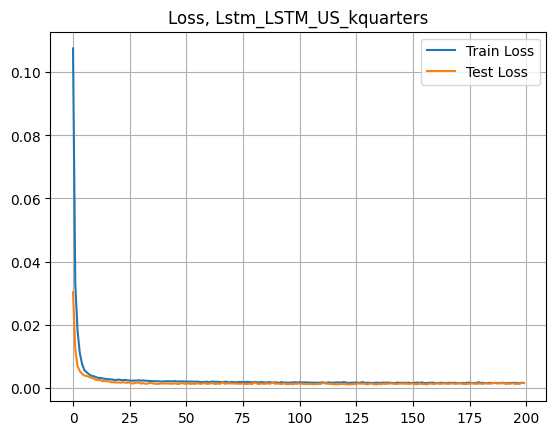

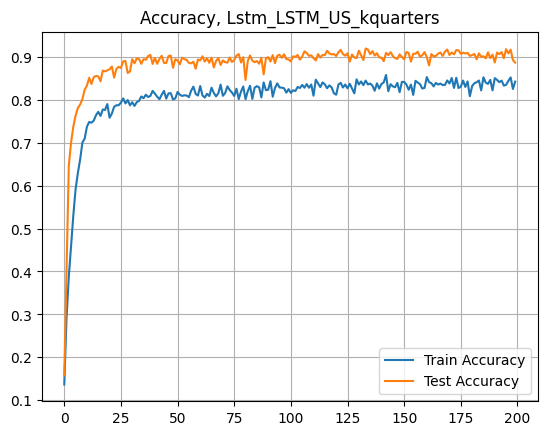

Plot Inference
pred: tensor([4., 3., 3., 3., 3., 3., 3., 3., 3., 3.], device='cuda:0')
truths: tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.], device='cuda:0')
diff_counter: Counter({0.0: 3271, 1.0: 367, 2.0: 42, 3.0: 3, 4.0: 2, 7.0: 1, 5.0: 1, 6.0: 1})
total_count=3688
[0.8869305856832972, 0.9864425162689805, 0.9978308026030369, 0.9986442516268981, 0.9991865509761388]


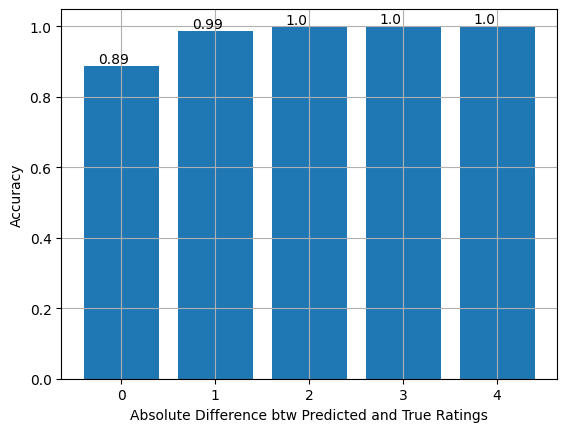

max_seq_len=2
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': False, 'balance_trend': False, 'balance_label': False} {'dropout': 0.2, 'batch_norm': False, 'num_lstm_layers': 2}
The model structure is:  LSTMModel(
  (lstm1): LSTM(99, 16, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [01:23<00:00,  2.39it/s, Loss: 0.001]


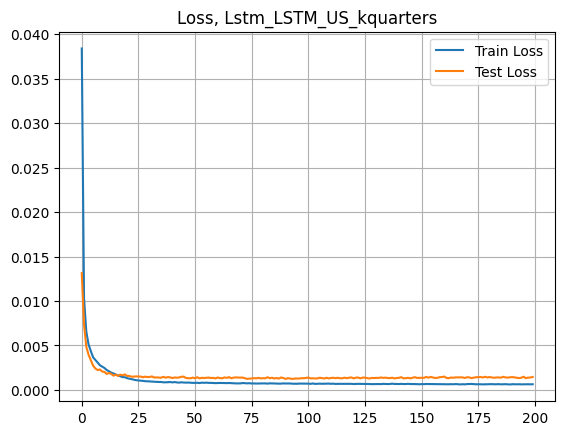

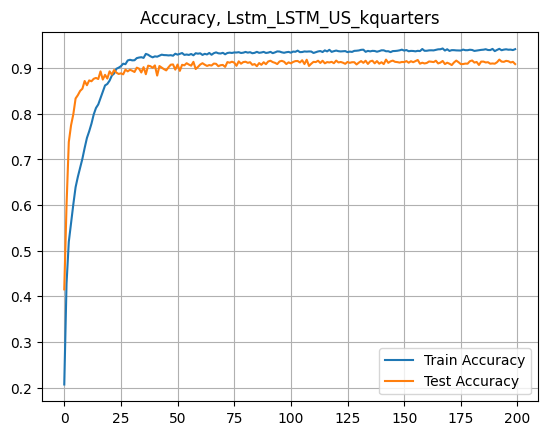

Plot Inference
pred: tensor([4., 3., 3., 3., 3., 3., 3., 3., 3., 3.], device='cuda:0')
truths: tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.], device='cuda:0')
diff_counter: Counter({0.0: 3352, 1.0: 280, 2.0: 43, 3.0: 7, 4.0: 3, 6.0: 2, 5.0: 1})
total_count=3688
[0.9088937093275488, 0.9848156182212582, 0.9964750542299349, 0.9983731019522777, 0.9991865509761388]


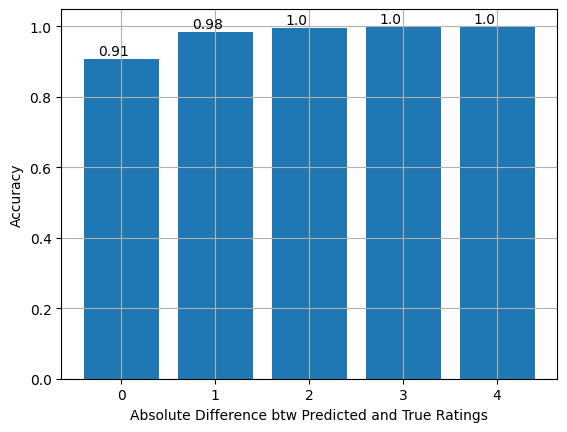

max_seq_len=2
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': False, 'balance_trend': False, 'balance_label': False} {'dropout': 0.0, 'batch_norm': True, 'num_lstm_layers': 2}
The model structure is:  LSTMModel(
  (lstm1): LSTM(99, 16, num_layers=2, batch_first=True)
  (batch_norm): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [02:08<00:00,  1.56it/s, Loss: 0.001]


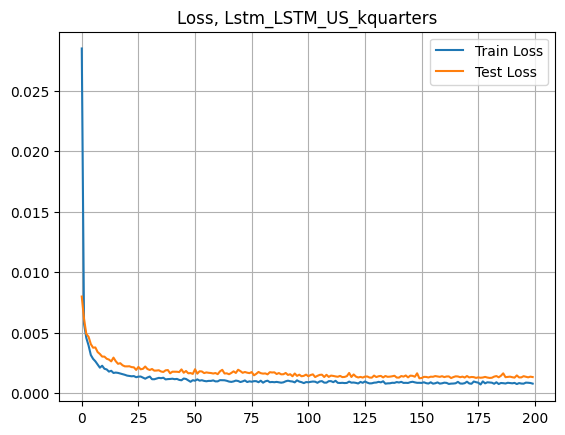

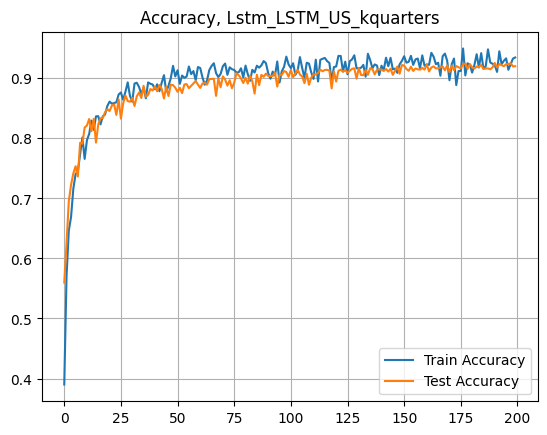

Plot Inference
pred: tensor([4., 3., 3., 3., 3., 3., 3., 3., 3., 3.], device='cuda:0')
truths: tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.], device='cuda:0')
diff_counter: Counter({0.0: 3393, 1.0: 259, 2.0: 26, 5.0: 5, 6.0: 2, 3.0: 2, 4.0: 1})
total_count=3688
[0.9200108459869848, 0.9902386117136659, 0.9972885032537961, 0.9978308026030369, 0.9981019522776573]


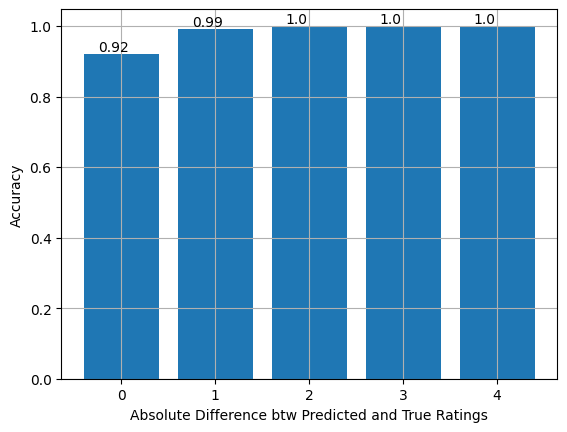

max_seq_len=2
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': False, 'balance_trend': False, 'balance_label': False} {'dropout': 0.0, 'batch_norm': False, 'num_lstm_layers': 2}
The model structure is:  LSTMModel(
  (lstm1): LSTM(99, 16, num_layers=2, batch_first=True)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [02:48<00:00,  1.19it/s, Loss: 0.002]


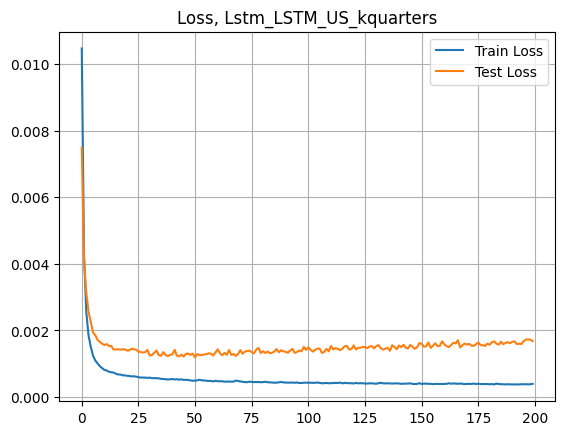

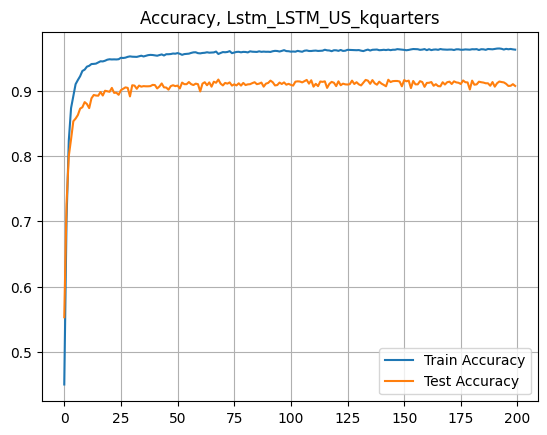

Plot Inference
pred: tensor([4., 3., 3., 3., 3., 3., 3., 3., 3., 3.], device='cuda:0')
truths: tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.], device='cuda:0')
diff_counter: Counter({0.0: 3345, 1.0: 271, 2.0: 53, 3.0: 12, 6.0: 3, 4.0: 2, 5.0: 2})
total_count=3688
[0.9069956616052061, 0.9804772234273319, 0.9948481561822126, 0.9981019522776573, 0.9986442516268981]


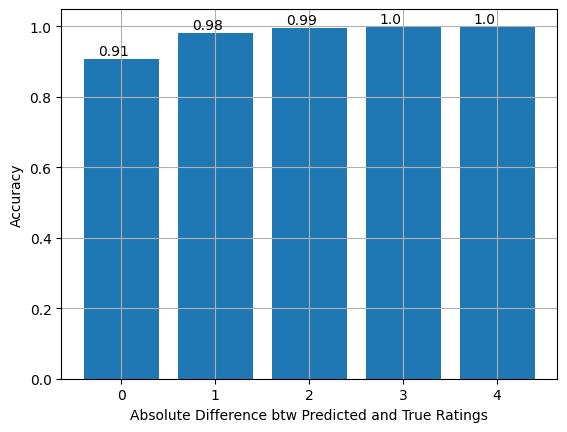

max_seq_len=1
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': False, 'balance_trend': False, 'balance_label': False} {'dropout': 0.0, 'batch_norm': False, 'num_lstm_layers': 1}
The model structure is:  LSTMModel(
  (lstm1): LSTM(99, 16, batch_first=True)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [02:38<00:00,  1.26it/s, Loss: 0.001]


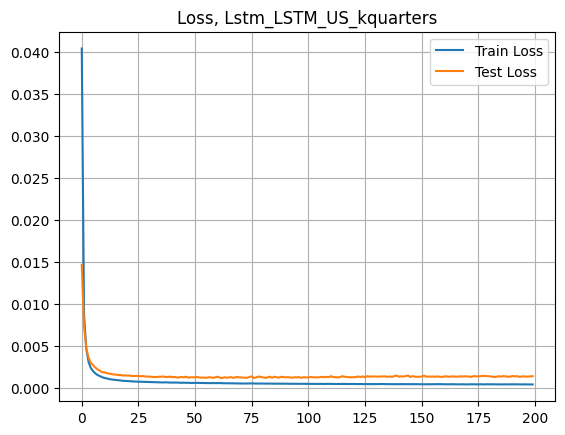

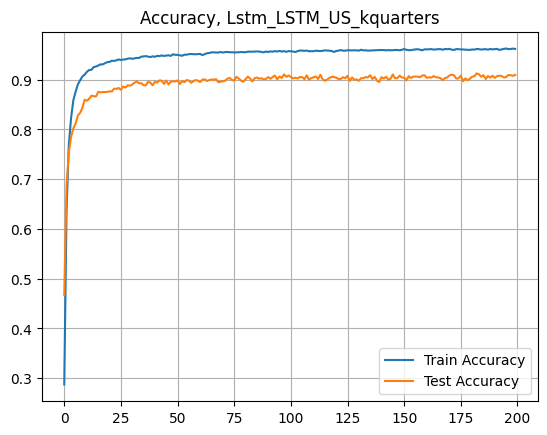

Plot Inference
pred: tensor([4., 3., 3., 3., 3., 3., 3., 3., 3., 3.], device='cuda:0')
truths: tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.], device='cuda:0')
diff_counter: Counter({0.0: 3355, 1.0: 285, 2.0: 37, 3.0: 5, 4.0: 3, 5.0: 2, 6.0: 1})
total_count=3688
[0.90970715835141, 0.9869848156182213, 0.9970173535791758, 0.9983731019522777, 0.9991865509761388]


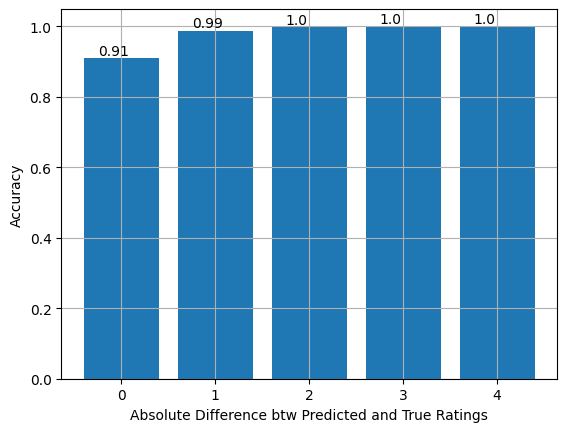

True
['actq', 'ancq', 'atq', 'cheq', 'cogsq', 'invtq', 'lctq', 'lltq', 'ltq', 'niq', 'ppentq', 'revtq', 'teqq', 'xsgaq', 'GrossProfitRatio', 'NetProfitRatio', 'CurrentRatio', 'QuickAcidRatio', 'CashRatio', 'EquityMultiplier', 'ReturnOnAsset', 'ReturnOnEquity', 'InventoryTurnover', 'CPI']
input_dict: 2510
output_dict: 1151
merged_dict: 775
612 163
max_seq_len=2
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': True, 'balance_trend': False, 'balance_label': False} {'dropout': 0.2, 'batch_norm': True, 'num_lstm_layers': 2}
The model structure is:  LSTMModel(
  (lstm1): LSTM(155, 16, num_layers=2, batch_first=True)
  (batch_norm): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [01:35<00:00,  2.09it/s, Loss: 0.002]


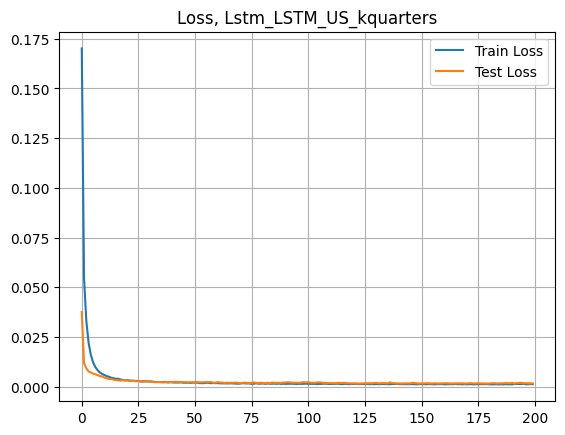

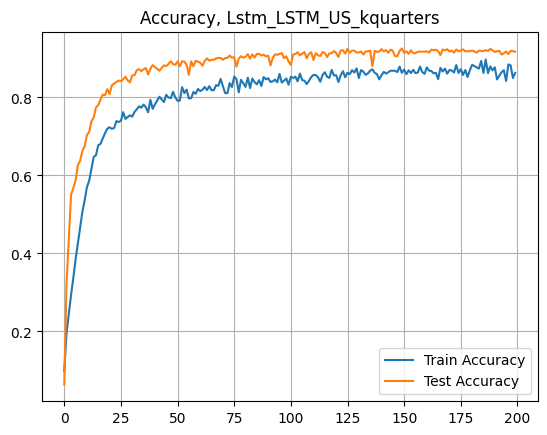

Plot Inference
pred: tensor([4., 5., 5., 5., 5., 5., 5., 5., 5., 5.], device='cuda:0')
truths: tensor([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.], device='cuda:0')
diff_counter: Counter({0.0: 3472, 1.0: 261, 2.0: 36, 5.0: 4, 4.0: 4, 3.0: 3, 6.0: 3, 7.0: 1})
total_count=3784
[0.9175475687103594, 0.986522198731501, 0.9960359408033826, 0.9968287526427061, 0.9978858350951374]


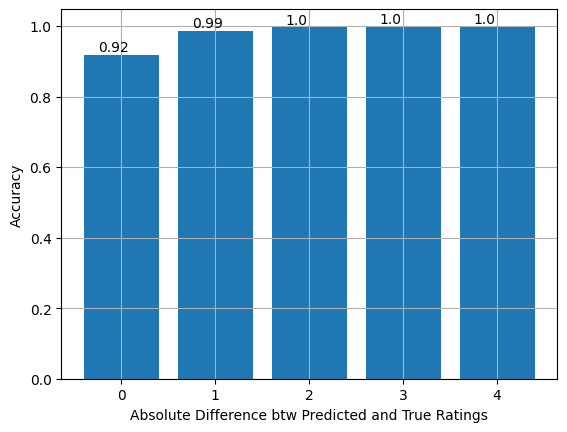

max_seq_len=1
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': True, 'balance_trend': False, 'balance_label': False} {'dropout': 0.2, 'batch_norm': True, 'num_lstm_layers': 1}
The model structure is:  LSTMModel(
  (lstm1): LSTM(155, 16, batch_first=True)
  (batch_norm): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [01:30<00:00,  2.21it/s, Loss: 0.001]


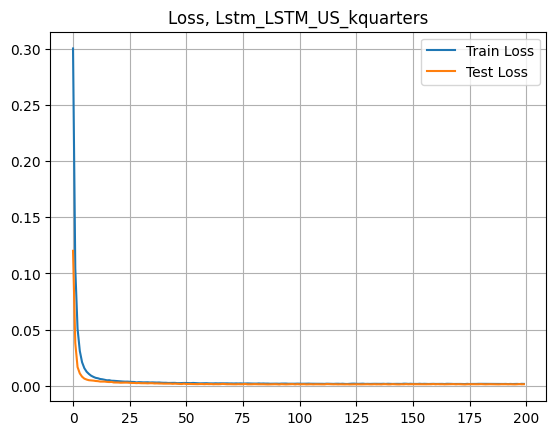

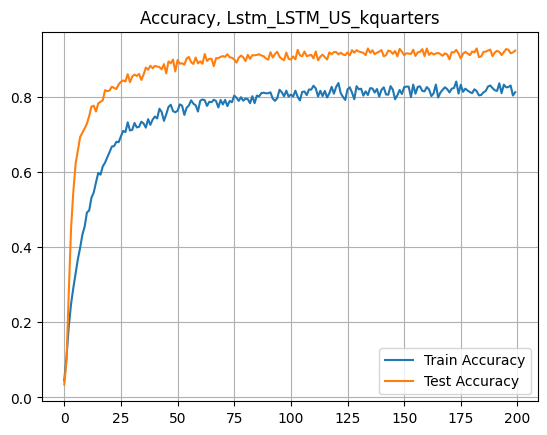

Plot Inference
pred: tensor([4., 5., 5., 5., 5., 5., 5., 5., 5., 4.], device='cuda:0')
truths: tensor([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.], device='cuda:0')
diff_counter: Counter({0.0: 3495, 1.0: 247, 2.0: 26, 3.0: 6, 5.0: 4, 4.0: 3, 6.0: 3})
total_count=3784
[0.9236257928118393, 0.9889006342494715, 0.9957716701902748, 0.9973572938689218, 0.9981501057082452]


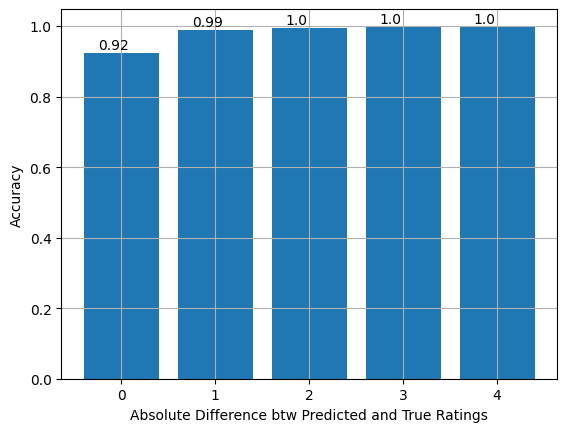

max_seq_len=2
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': True, 'balance_trend': False, 'balance_label': False} {'dropout': 0.2, 'batch_norm': False, 'num_lstm_layers': 2}
The model structure is:  LSTMModel(
  (lstm1): LSTM(155, 16, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [01:45<00:00,  1.89it/s, Loss: 0.002]


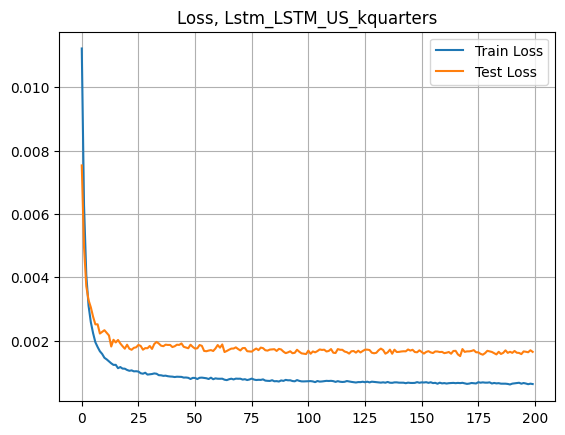

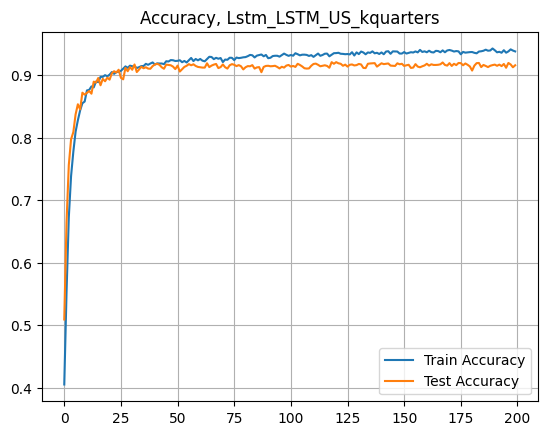

Plot Inference
pred: tensor([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.], device='cuda:0')
truths: tensor([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.], device='cuda:0')
diff_counter: Counter({0.0: 3465, 1.0: 270, 2.0: 26, 3.0: 12, 5.0: 6, 4.0: 3, 6.0: 2})
total_count=3784
[0.9156976744186046, 0.9870507399577167, 0.99392177589852, 0.997093023255814, 0.9978858350951374]


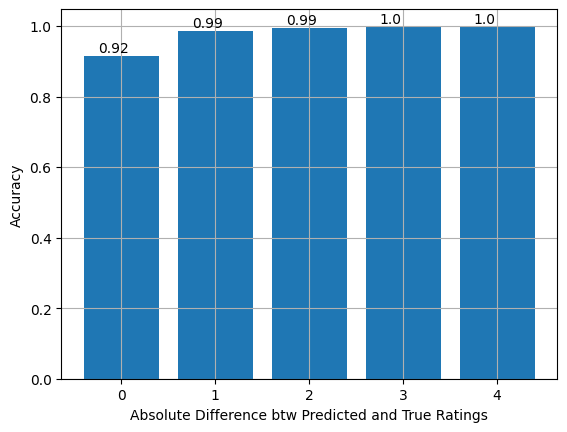

max_seq_len=2
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': True, 'balance_trend': False, 'balance_label': False} {'dropout': 0.0, 'batch_norm': True, 'num_lstm_layers': 2}
The model structure is:  LSTMModel(
  (lstm1): LSTM(155, 16, num_layers=2, batch_first=True)
  (batch_norm): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [03:03<00:00,  1.09it/s, Loss: 0.002]


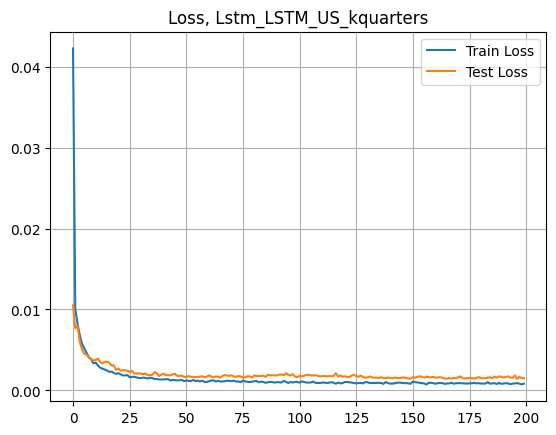

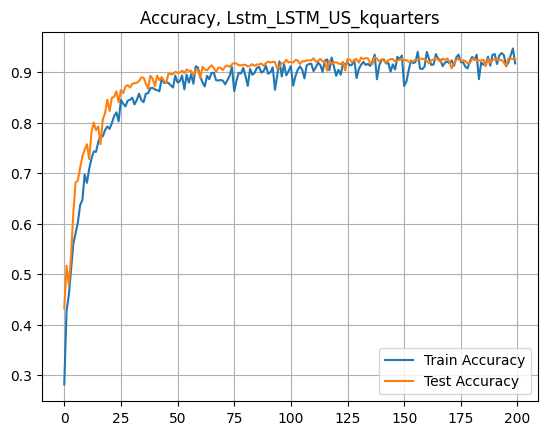

Plot Inference
pred: tensor([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.], device='cuda:0')
truths: tensor([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.], device='cuda:0')
diff_counter: Counter({0.0: 3502, 1.0: 239, 2.0: 27, 3.0: 6, 5.0: 4, 6.0: 3, 4.0: 2, 7.0: 1})
total_count=3784
[0.9254756871035941, 0.9886363636363636, 0.9957716701902748, 0.9973572938689218, 0.9978858350951374]


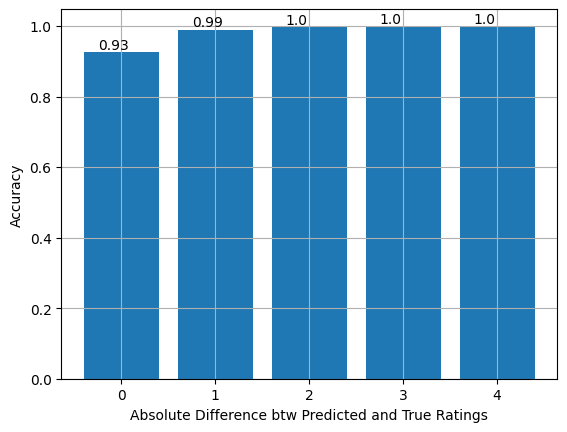

max_seq_len=2
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': True, 'balance_trend': False, 'balance_label': False} {'dropout': 0.0, 'batch_norm': False, 'num_lstm_layers': 2}
The model structure is:  LSTMModel(
  (lstm1): LSTM(155, 16, num_layers=2, batch_first=True)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [03:32<00:00,  1.06s/it, Loss: 0.002]


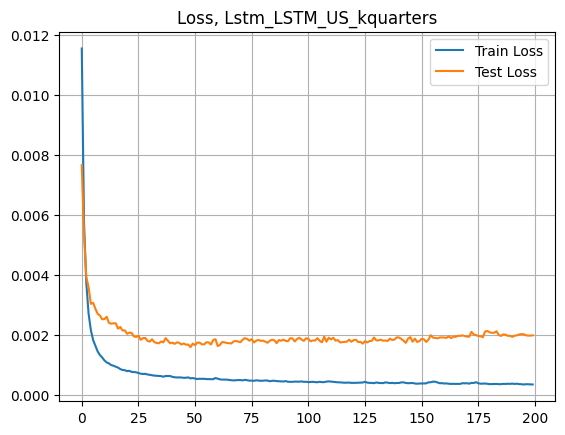

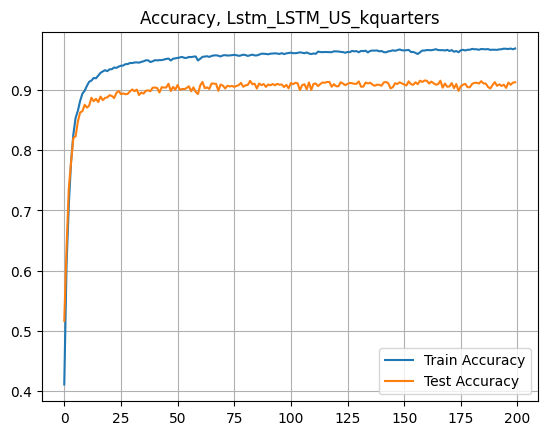

Plot Inference
pred: tensor([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.], device='cuda:0')
truths: tensor([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.], device='cuda:0')
diff_counter: Counter({0.0: 3453, 1.0: 284, 2.0: 29, 3.0: 8, 6.0: 4, 5.0: 3, 10.0: 2, 4.0: 1})
total_count=3784
[0.9125264270613108, 0.9875792811839323, 0.9952431289640592, 0.9973572938689218, 0.9976215644820295]


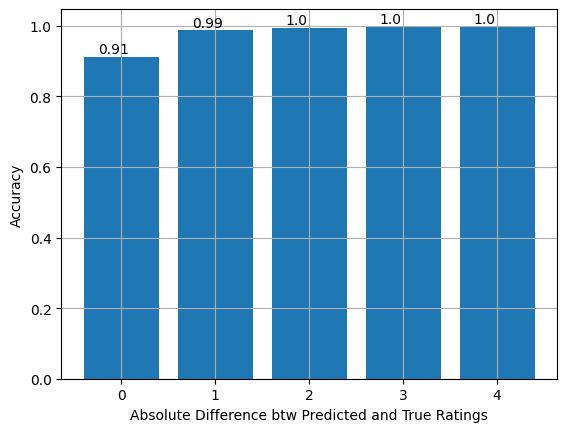

max_seq_len=1
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': True, 'balance_trend': False, 'balance_label': False} {'dropout': 0.0, 'batch_norm': False, 'num_lstm_layers': 1}
The model structure is:  LSTMModel(
  (lstm1): LSTM(155, 16, batch_first=True)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [03:26<00:00,  1.03s/it, Loss: 0.003]


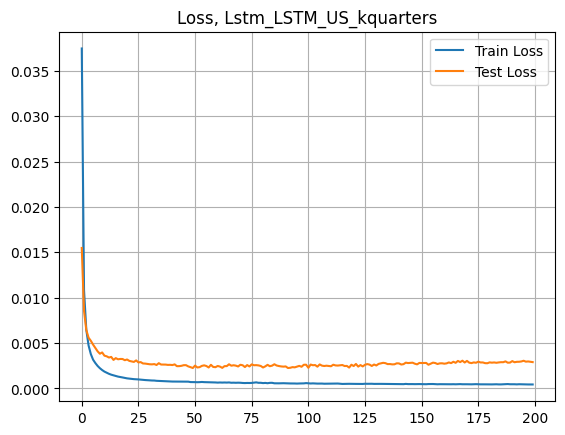

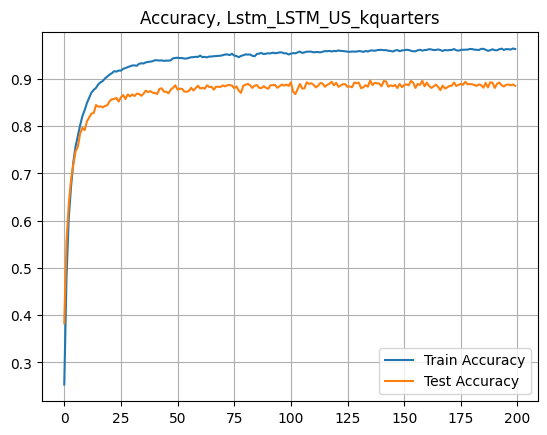

Plot Inference
pred: tensor([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.], device='cuda:0')
truths: tensor([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.], device='cuda:0')
diff_counter: Counter({0.0: 3350, 1.0: 363, 2.0: 47, 5.0: 6, 3.0: 5, 4.0: 5, 9.0: 2, 7.0: 2, 8.0: 2, 6.0: 1, 11.0: 1})
total_count=3784
[0.885306553911205, 0.9812367864693446, 0.9936575052854123, 0.9949788583509513, 0.9963002114164905]


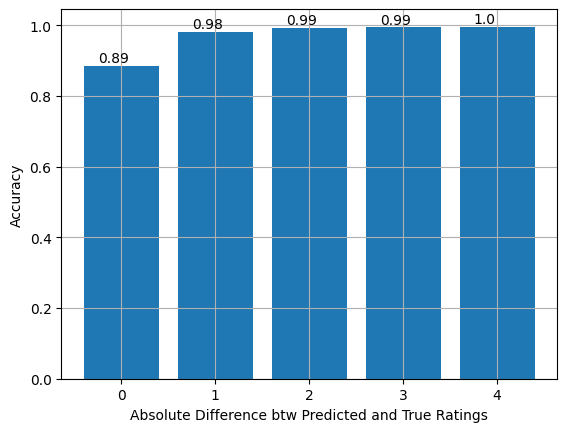

True
['actq', 'ancq', 'atq', 'cheq', 'cogsq', 'invtq', 'lctq', 'lltq', 'ltq', 'niq', 'ppentq', 'revtq', 'teqq', 'xsgaq', 'GrossProfitRatio', 'NetProfitRatio', 'CurrentRatio', 'QuickAcidRatio', 'CashRatio', 'EquityMultiplier', 'ReturnOnAsset', 'ReturnOnEquity', 'InventoryTurnover', 'CPI']
input_dict: 2510
output_dict: 1151
merged_dict: 775
The number of each labels: {5.0: 923, 3.0: 1131, 4.0: 1184}
233 152
max_seq_len=2
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': True, 'balance_trend': False, 'balance_label': True} {'dropout': 0.2, 'batch_norm': True, 'num_lstm_layers': 2}
The model structure is:  LSTMModel(
  (lstm1): LSTM(155, 16, num_layers=2, batch_first=True)
  (batch_norm): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [01:58<00:00,  1.69it/s, Loss: 0.003]


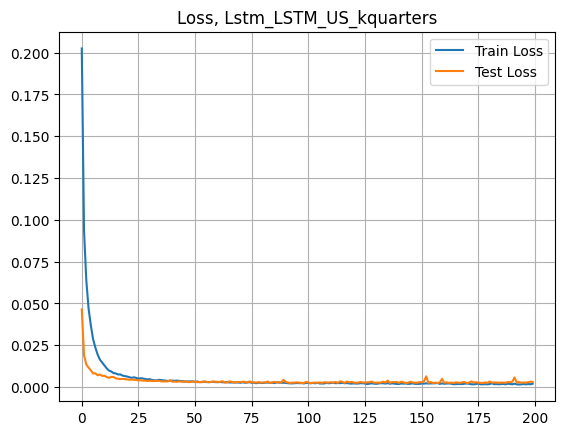

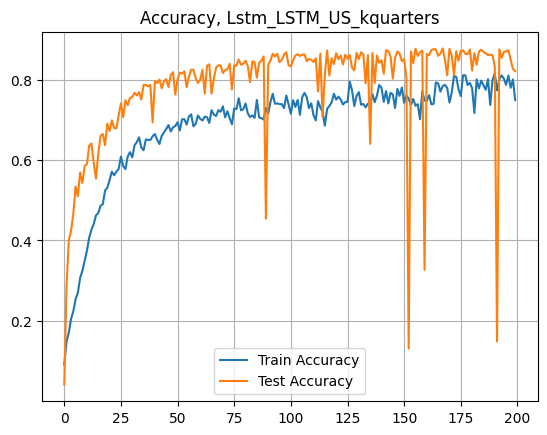

Plot Inference
pred: tensor([6., 5., 5., 4., 4., 5., 5., 5., 5., 8.], device='cuda:0')
truths: tensor([ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5., 10., 10.], device='cuda:0')
diff_counter: Counter({0.0: 2912, 1.0: 519, 2.0: 86, 3.0: 15, 4.0: 10, 5.0: 6})
total_count=3548
[0.8207440811724915, 0.9670236753100339, 0.9912626832018039, 0.9954904171364148, 0.9983089064261556]


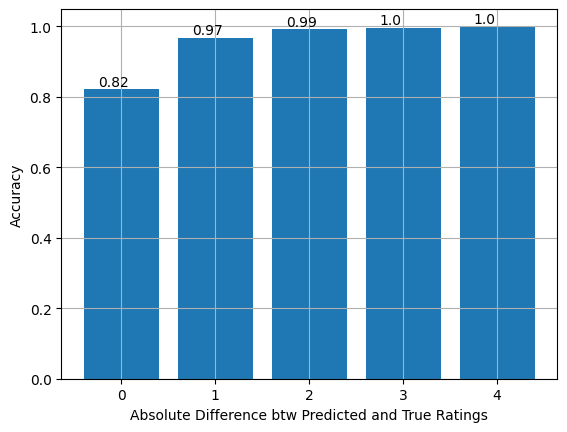

max_seq_len=1
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': True, 'balance_trend': False, 'balance_label': True} {'dropout': 0.2, 'batch_norm': True, 'num_lstm_layers': 1}
The model structure is:  LSTMModel(
  (lstm1): LSTM(155, 16, batch_first=True)
  (batch_norm): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [01:36<00:00,  2.06it/s, Loss: 0.002]


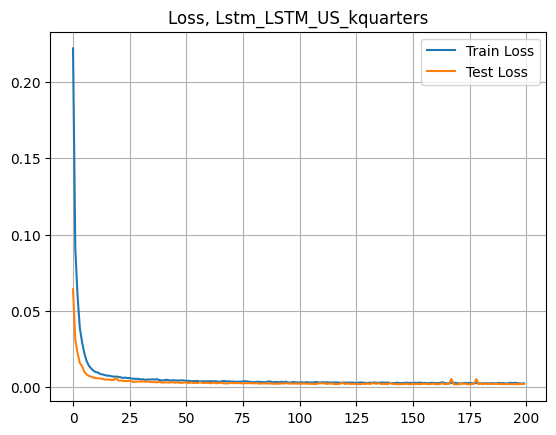

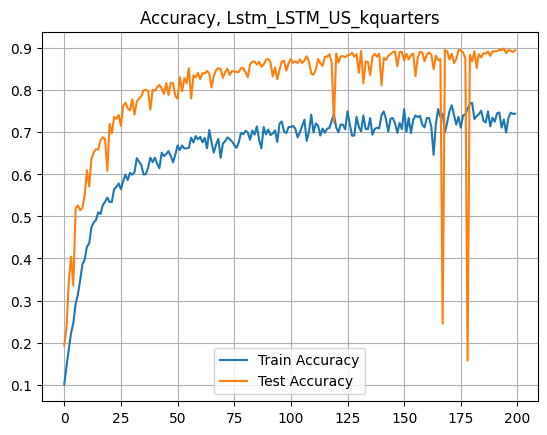

Plot Inference
pred: tensor([6., 5., 5., 5., 5., 5., 5., 5., 5., 8.], device='cuda:0')
truths: tensor([ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5., 10., 10.], device='cuda:0')
diff_counter: Counter({0.0: 3176, 1.0: 298, 2.0: 52, 3.0: 15, 5.0: 3, 4.0: 3, 6.0: 1})
total_count=3548
[0.895152198421646, 0.9791431792559189, 0.9937993235625705, 0.9980270574971815, 0.9988726042841037]


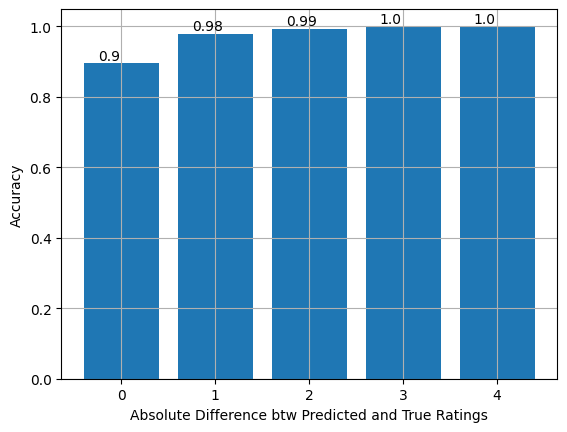

max_seq_len=2
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': True, 'balance_trend': False, 'balance_label': True} {'dropout': 0.2, 'batch_norm': False, 'num_lstm_layers': 2}
The model structure is:  LSTMModel(
  (lstm1): LSTM(155, 16, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [00:44<00:00,  4.48it/s, Loss: 0.003]


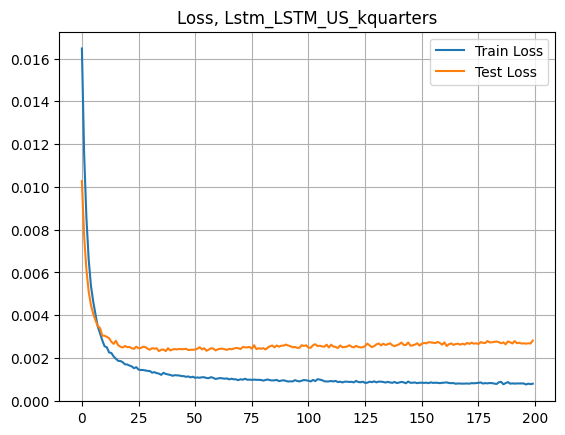

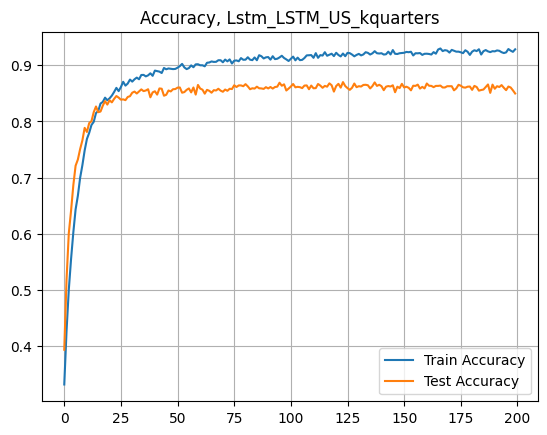

Plot Inference
pred: tensor([7., 5., 5., 5., 4., 5., 5., 6., 5., 8.], device='cuda:0')
truths: tensor([ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5., 10., 10.], device='cuda:0')
diff_counter: Counter({0.0: 3015, 1.0: 410, 2.0: 86, 3.0: 24, 5.0: 6, 4.0: 6, 6.0: 1})
total_count=3548
[0.8497745208568207, 0.9653325817361894, 0.9895715896279594, 0.9963359639233371, 0.9980270574971815]


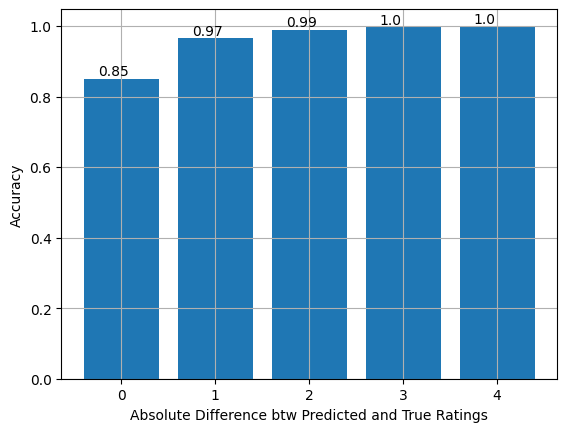

max_seq_len=2
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': True, 'balance_trend': False, 'balance_label': True} {'dropout': 0.0, 'batch_norm': True, 'num_lstm_layers': 2}
The model structure is:  LSTMModel(
  (lstm1): LSTM(155, 16, num_layers=2, batch_first=True)
  (batch_norm): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [00:48<00:00,  4.12it/s, Loss: 0.003]


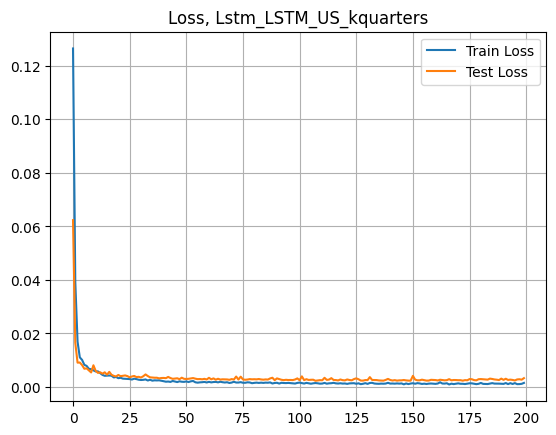

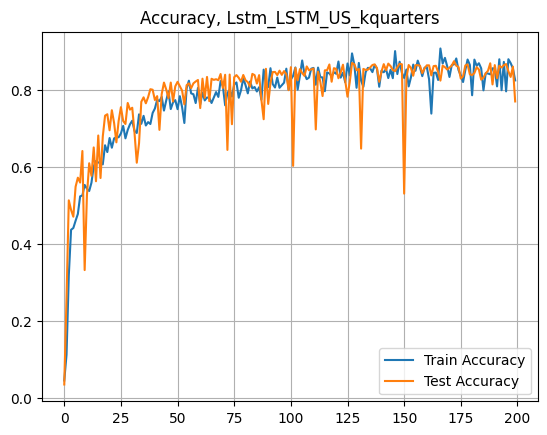

Plot Inference
pred: tensor([6., 5., 6., 5., 5., 5., 5., 5., 5., 8.], device='cuda:0')
truths: tensor([ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5., 10., 10.], device='cuda:0')
diff_counter: Counter({0.0: 2733, 1.0: 708, 2.0: 73, 3.0: 22, 5.0: 6, 4.0: 4, 7.0: 2})
total_count=3548
[0.770293122886133, 0.9698421645997746, 0.9904171364148816, 0.9966178128523112, 0.9977452085682075]


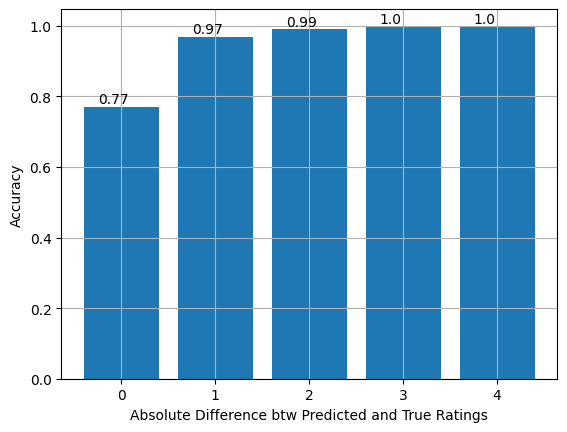

max_seq_len=2
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': True, 'balance_trend': False, 'balance_label': True} {'dropout': 0.0, 'batch_norm': False, 'num_lstm_layers': 2}
The model structure is:  LSTMModel(
  (lstm1): LSTM(155, 16, num_layers=2, batch_first=True)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [00:45<00:00,  4.35it/s, Loss: 0.003]


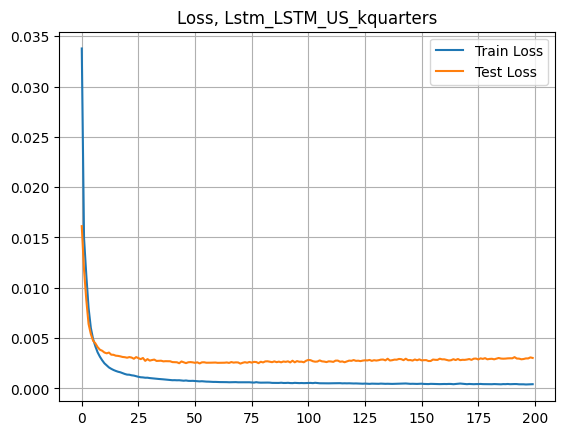

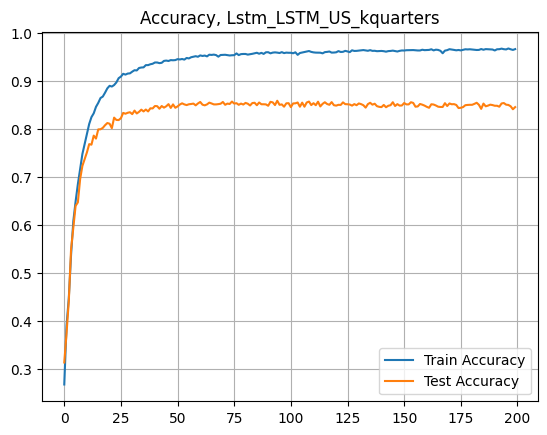

Plot Inference
pred: tensor([6., 5., 5., 5., 5., 5., 5., 6., 6., 7.], device='cuda:0')
truths: tensor([ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5., 10., 10.], device='cuda:0')
diff_counter: Counter({0.0: 3001, 1.0: 414, 2.0: 96, 3.0: 19, 4.0: 11, 5.0: 4, 6.0: 3})
total_count=3548
[0.8458286358511837, 0.9625140924464487, 0.9895715896279594, 0.9949267192784668, 0.9980270574971815]


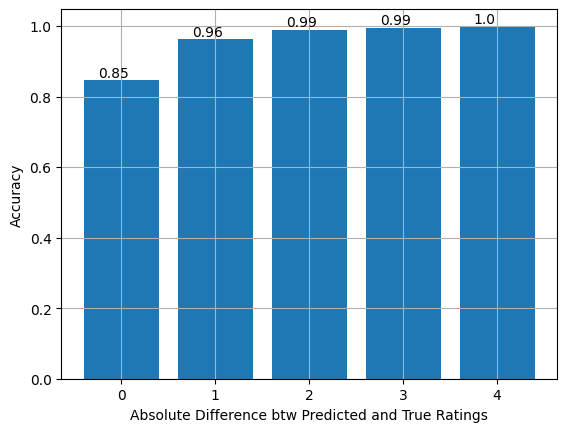

max_seq_len=1
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': True, 'balance_trend': False, 'balance_label': True} {'dropout': 0.0, 'batch_norm': False, 'num_lstm_layers': 1}
The model structure is:  LSTMModel(
  (lstm1): LSTM(155, 16, batch_first=True)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [00:44<00:00,  4.47it/s, Loss: 0.003]


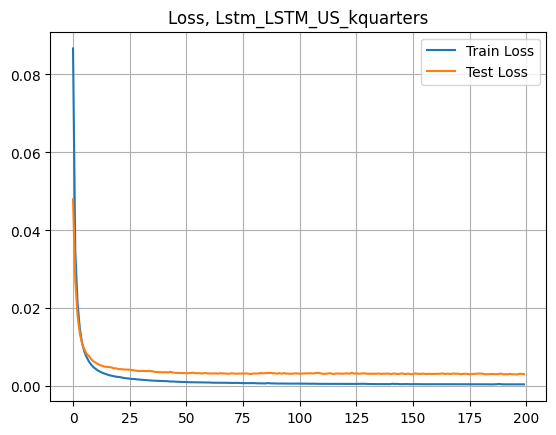

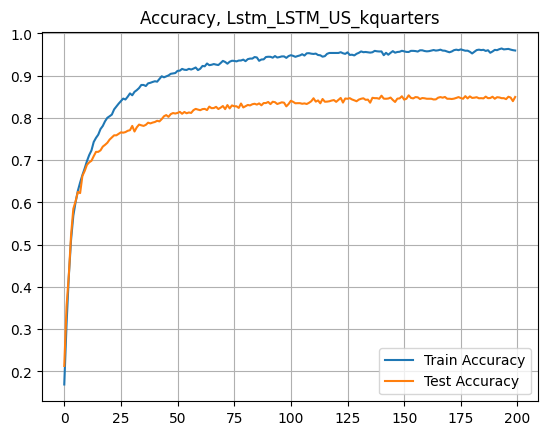

Plot Inference
pred: tensor([5., 6., 5., 5., 4., 5., 5., 5., 5., 9.], device='cuda:0')
truths: tensor([ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5., 10., 10.], device='cuda:0')
diff_counter: Counter({0.0: 3014, 1.0: 415, 2.0: 76, 3.0: 23, 4.0: 12, 5.0: 6, 6.0: 2})
total_count=3548
[0.8494926719278467, 0.9664599774520857, 0.987880496054115, 0.9943630214205186, 0.9977452085682075]


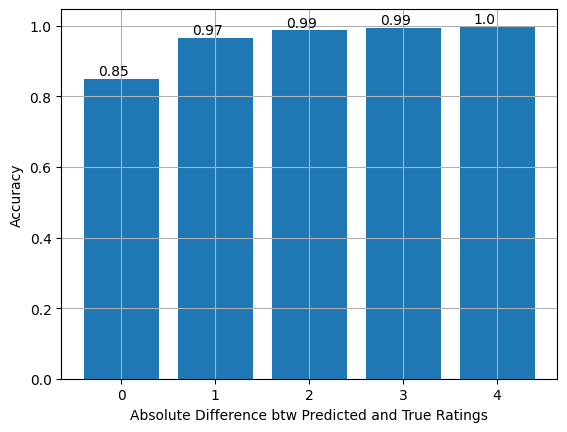

In [7]:
for preprocessing in preprocessing_options1:
    from CompustatExtractor import CompustatExtractor
    importlib.reload(Hypers)
    feature_dict = CompustatExtractor.process_compustat_features(features_path, 
                                                                save=False, 
                                                                add_cpi=preprocessing["add_cpi"], 
                                                                add_diff=preprocessing["add_diff"], 
                                                                norm=preprocessing["standardize"], 
                                                                filestem="feature_US_new_kquarters"
                                                                )
    rating_dict = CompustatExtractor.process_compustat_ratings(ratings_path, 
                                                            save=True, 
                                                            filestem="rating_US_new_kquarters"
                                                            )
    # k = 4  
    # feature_dict = CompustatExtractor.concatenate_features(feature_dict, k=k)

    if preprocessing["balance_trend"]:
        processor = RatingProcessor(os.path.join(Hypers.Config.data_path, "rating_US_new_kquarters.pkl"))
        final_ratings= processor.process_ratings('output/ratings_US_Processed_std_new_kquarters.pkl')
        feature  = feature_dict
        all_ratings = rating_dict
        merged_data = utils.merge_input_output_dicts_k(feature, final_ratings, all_ratings, 4, verbose=True)
    else: 
        feature  = feature_dict
        all_ratings = rating_dict
        final_ratings = rating_dict
        merged_dict = utils.merge_input_output_dicts_k(feature, final_ratings, all_ratings, 4, verbose=True)

    if preprocessing["balance_label"]:
        train_dict, test_dict = utils.spilt_train_valid(merged_dict, random_select=True, save=False, suffix=suffix)
        train_dict = utils.balance_train_dict(train_dict)
        print(len(train_dict), len(test_dict))
    else:
        train_dict, test_dict = utils.spilt_train_valid(merged_dict, random_select=True, save=False, suffix=suffix)
        print(len(train_dict), len(test_dict))
        
    for architecture in architecture_options:
        max_seq_len = architecture["num_lstm_layers"]
        print(f"{max_seq_len=}")
        print("Current seeting is: ", preprocessing, architecture)
        if preprocessing["add_diff"]:
            input_dim = 155
        else:
            input_dim = 99


        model = LSTMModel.LSTMModel(input_size=input_dim,
                                            hidden_size=Hypers.Config.hidden_size,
                                            num_layers=max_seq_len,
                                            batch_norm=architecture["batch_norm"],
                                            dropout=architecture["dropout"],
                                            proj_size=Hypers.Config.proj_size)
        criterion = nn.MSELoss(reduction="sum")
        optimizer = torch.optim.Adam(model.parameters(), lr=Hypers.Config.learning_rate)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10, factor=0.1)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print("The model structure is: ", model)

        train_set, test_set = LSTMDataset.LSTMDataset(train_dict), LSTMDataset.LSTMDataset(test_dict)
        train_loader = DataLoader(train_set, batch_size=Hypers.Config.batch_size, shuffle=True, collate_fn=LSTMDataset.LSTMDataset.custom_collate_fn)
        test_loader = DataLoader(test_set, batch_size=Hypers.Config.batch_size, shuffle=True, collate_fn=LSTMDataset.LSTMDataset.custom_collate_fn)

        trainer = Trainer.Trainer(model, criterion, optimizer, device, train_loader, test_loader, max_seq_len)
        train_loss, train_accuracy, test_loss, test_accuracy = trainer.train_loop()
        utils.plot_graph(train_loss, train_accuracy, test_loss, test_accuracy, identifier=f"{model_type}_{suffix}")

        print("Plot Inference")

        test_loader = DataLoader(test_set, batch_size=Hypers.Config.batch_size, shuffle=False, collate_fn=LSTMDataset.LSTMDataset.custom_collate_fn)
        inferencer = Inferencer.Inferencer(model=model, test_loader=test_loader, device=device)
        predictions, turths, features, accuracy, diff_counter = inferencer.infer()
        nums = 10
        print("pred:", predictions[:nums])
        print("truths:", turths[:nums])
        print("diff_counter:", diff_counter)
        total_count = sum(diff_counter.values())
        print(f"{total_count=}")

        accumulated_count = []

        for i in range(0, 33):
            count = diff_counter[i]
            if i==0:
                accumulated_count.append(count)
                continue
            accumulated_count.append(accumulated_count[-1]+count)

        accumulated_accuracy = [i/total_count for i in accumulated_count]
        print(accumulated_accuracy[:5])

        plt.bar(range(0,5), accumulated_accuracy[:5])
        for i, v in enumerate(accumulated_accuracy[:5]):
            plt.text(i - 0.25, v + 0.01, str(round(v, 2)))
        plt.xlabel("Absolute Difference btw Predicted and True Ratings")
        plt.ylabel("Accuracy")
        plt.grid()
        plt.show()
            